In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Section1: Data Exploration
---
### Data Cleaning
1. Check the number of missing values in each column 
2. Filled missing values in punish_num with 0 value
3. Filled missing values in ad_revenue with the value in the avg_ad_revenue 
4. Filled missing values in start_time with the value in the latest_punish_begin_date 
5. Convert p_date into datetime format
6. Create two new columns, which are date difference between start_date and p_date & date difference between latest_punish_begin_date and p_date
7. Correlation analysis among the 4 numerical columns 
8. Visualisation to study the distribution of numerical data 

In [3]:
#read data
ads = pd.read_excel("sample_data.xlsx", sheet_name=0, header=1)
ads.head()

,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
0,20230807,1747578422390810,US,USCA,1.0,2023-07-24,5132.1700,4795.250,2022-10-24 14:36:00,1.78,Auction Ads,auction_relation
1,20230807,1758543228094480,SA,MENA,1.0,2023-06-14,1976.2500,1063.767,2023-02-22 15:50:00,1.67,RIE,Ad Group Recall (Merged)
2,20230807,1738303151826990,AU,AU,2.0,2023-07-24,1.7355,5.365,2022-07-14 05:00:00,1.84,Auction Ads,auction_relation
3,20230807,1738303920938010,NZ,NZ,2.0,2023-07-24,NaN,5.365,2022-07-14 05:16:00,1.58,Auction Ads,auction_relation
4,20230807,1738304016410620,NZ,NZ,2.0,2023-07-24,1.5250,5.365,2022-07-14 05:17:00,1.58,Auction Ads,auction_relation


In [4]:
tenth_percentile = np.percentile(ads['latest_punish_begin_date'], 10)
print(tenth_percentile)

2000-01-01T00:00:00.000000000


In [5]:
ads['punish_num'] = ads['punish_num'].fillna(0)
ads['ad_revenue'].fillna(ads['avg_ad_revenue'], inplace=True)
#ads['start_time'].fillna(ads['latest_punish_begin_date'], inplace=True)
ads['start_time'].fillna('2000-01-01T00:00:00.000000000', inplace=True)

In [15]:
missing_values = ads.isna().sum()
print(missing_values)

p_date                          0
ad_id                           0
delivery_country                0
queue_market                21155
punish_num                      0
latest_punish_begin_date        0
ad_revenue                      0
avg_ad_revenue                  0
start_time                      0
baseline_st                     0
product_line                    0
task_type_en                    0
dtype: int64


In [6]:
ads['p_date'] = pd.to_datetime(ads['p_date'], format='%Y%m%d')  # You may need to specify the format if it's not in YYYYMMDD format
ads['start_time'] = pd.to_datetime(ads['start_time'], format='%Y%m%d')

ads['date_difference_bet_start_date'] = np.abs((ads['p_date'] - ads['start_time']).dt.days )
ads['date_difference_bet_punish_date'] = (ads['p_date'] - ads['latest_punish_begin_date']).dt.days

In [17]:
ads.describe()

,p_date,ad_id,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,date_difference_bet_start_date,date_difference_bet_punish_date
count,40679,4.067900e+04,40679.000000,40679,40679.000000,40679.000000,40679,40679.000000,40679.000000,40679.000000
mean,2023-08-07 00:00:00,1.772982e+15,0.067086,2001-05-20 15:09:47.536566784,58.626704,23.887703,2019-09-16 20:05:54.259445760,1.206670,1420.647754,8113.368200
min,2023-08-07 00:00:00,1.697828e+15,0.000000,2000-01-01 00:00:00,0.000000,0.000000,2000-01-01 00:00:00,0.540000,0.000000,0.000000
25%,2023-08-07 00:00:00,1.773396e+15,0.000000,2000-01-01 00:00:00,0.810100,0.835250,2023-07-27 11:52:30,0.540000,1.000000,8619.000000
50%,2023-08-07 00:00:00,1.773532e+15,0.000000,2000-01-01 00:00:00,3.750000,2.597900,2023-08-06 12:38:00,1.400000,1.000000,8619.000000
75%,2023-08-07 00:00:00,1.773564e+15,0.000000,2000-01-01 00:00:00,14.469250,8.269100,2023-08-07 08:28:00,1.780000,10.000000,8619.000000
max,2023-08-07 00:00:00,1.773617e+15,16.000000,2023-08-07 00:00:00,27100.620000,17144.498600,2023-09-13 07:00:00,7.590000,8619.000000,8619.000000
std,NaN,2.562183e+12,0.337079,NaN,430.908998,187.580436,NaN,0.659845,3189.448887,2022.510702


                                 punish_num  latest_punish_begin_date  \
punish_num                         1.000000                  0.795954   
latest_punish_begin_date           0.795954                  1.000000   
avg_ad_revenue                    -0.006130                 -0.007237   
ad_revenue                        -0.004147                 -0.010768   
baseline_st                        0.159030                  0.174157   
date_difference_bet_start_date    -0.061390                 -0.072781   
date_difference_bet_punish_date   -0.795954                 -1.000000   

                                 avg_ad_revenue  ad_revenue  baseline_st  \
punish_num                            -0.006130   -0.004147     0.159030   
latest_punish_begin_date              -0.007237   -0.010768     0.174157   
avg_ad_revenue                         1.000000    0.595603     0.108312   
ad_revenue                             0.595603    1.000000     0.109442   
baseline_st                        

<Axes: >

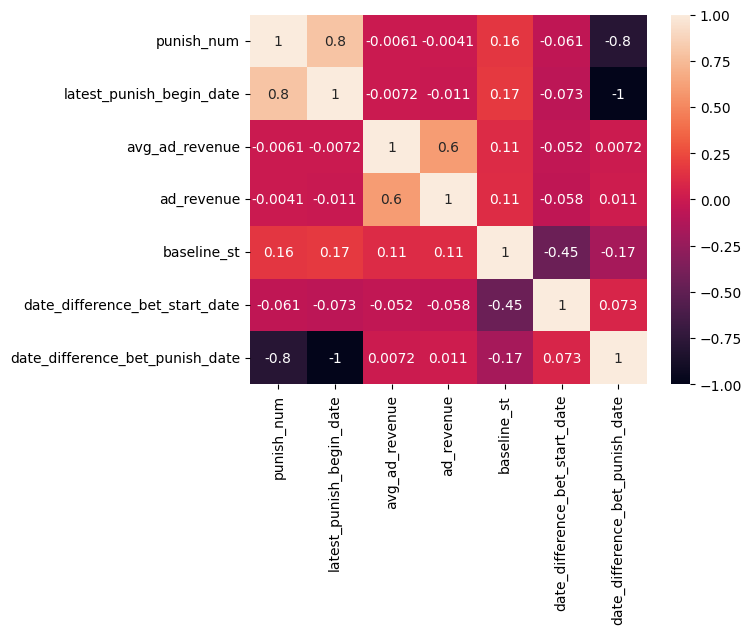

In [7]:
correlation_matrix = ads[['punish_num', 'latest_punish_begin_date','avg_ad_revenue','ad_revenue','baseline_st', 'date_difference_bet_start_date','date_difference_bet_punish_date']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns.values, yticklabels=correlation_matrix.columns.values, annot = True, annot_kws={'size':10})
# would it be concerning for punish num and date_difference_bet_punish_date  to have such a high negative correlation?

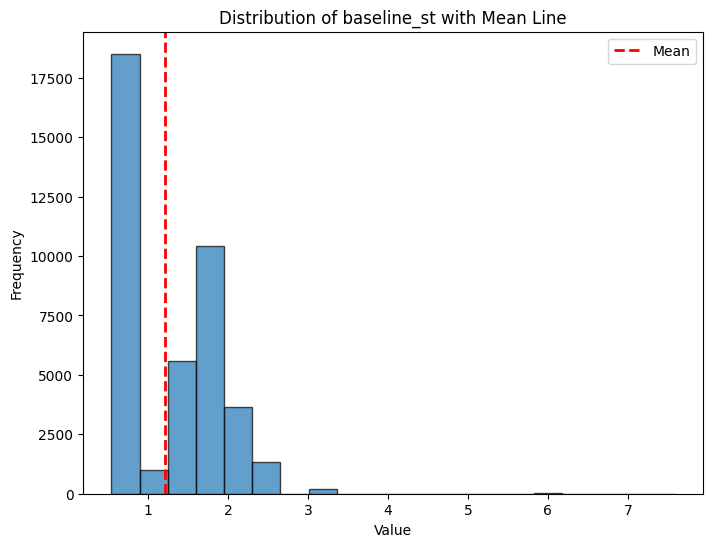

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(ads['baseline_st'], bins=20, edgecolor='k', alpha=0.7)  # Add alpha for transparency
plt.axvline(ads['baseline_st'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Distribution of baseline_st with Mean Line')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()  # Add legend to label the Mean line
plt.show()

/Users/marinayou/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marinayou/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marinayou/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marinayou/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

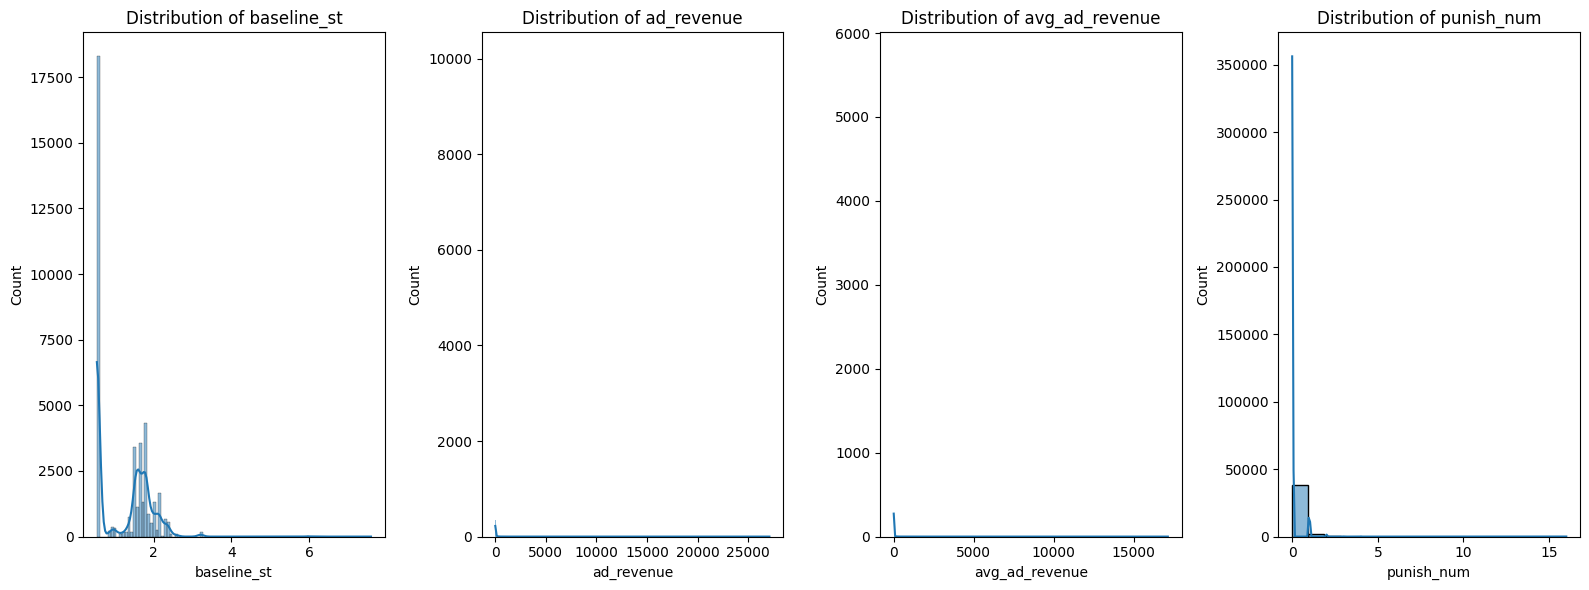

In [20]:

# List of numerical columns to visualize
numerical_columns = ['baseline_st', 'ad_revenue', 'avg_ad_revenue','punish_num']

# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(16, 6))

# If you have only one column, you don't need to flatten the axes
# Loop through each numerical column and create a distribution plot
for i, column in enumerate(numerical_columns):
    sns.histplot(ads[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()

plt.show()


# SECTION 2: Scoring Model 
---

Standarise all the columns we will used for scoring model.

We will generate a score ranged from 0 to 1. The data can be divided into 4 parts -- risk, profitability, urgency, complexity 

1. For risk, we will generate a score for it by considering punish_num_scaled and date_difference_bet_punish_date_scaled. Considering that the number of times punished may be more important than the most recent punishment time, the ratio is 0.6:0.4.
[risk = 0.6* punish_num_scaled + 0.4 * date_difference_bet_punish_date_scaled] 

2. For profitability, we will generate a score for it by considering avg_ad_revenue, and ad_revenue. 
    [profitability = 0.4* avg_ad_revenue_scaled + 0.6* ad_revenue_scaled]

    
3. For urgency, we consider the date_diff_bet_start_date column, the less days given, the more urgent
4. For complexity, we consider the baseline_st_scaled column

Then we will combine these four components together to generate the priority score for each ads. 

In [37]:
used = ads[['punish_num','ad_revenue','avg_ad_revenue','baseline_st', 'date_difference_bet_start_date','date_difference_bet_punish_date']]

In [38]:
used.describe()

,punish_num,ad_revenue,avg_ad_revenue,baseline_st,date_difference_bet_start_date,date_difference_bet_punish_date
count,40679.000000,40679.000000,40679.000000,40679.000000,40679.000000,40679.000000
mean,0.067086,58.626704,23.887703,1.206670,1420.647754,8113.368200
std,0.337079,430.908998,187.580436,0.659845,3189.448887,2022.510702
min,0.000000,0.000000,0.000000,0.540000,0.000000,0.000000
25%,0.000000,0.810100,0.835250,0.540000,1.000000,8619.000000
50%,0.000000,3.750000,2.597900,1.400000,1.000000,8619.000000
75%,0.000000,14.469250,8.269100,1.780000,10.000000,8619.000000
max,16.000000,27100.620000,17144.498600,7.590000,8619.000000,8619.000000


In [39]:
used.columns

Index(['punish_num', 'ad_revenue', 'avg_ad_revenue', 'baseline_st',
       'date_difference_bet_start_date', 'date_difference_bet_punish_date'],
      dtype='object')

In [40]:
# standarisation
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

used[['punish_num_scaled', 'avg_ad_revenue_scaled', 'ad_revenue_scaled','baseline_st_scaled', 'date_diff_bet_start_date_scaled', 'date_difference_bet_punish_date_scaled']] = scaler.fit_transform(used[['punish_num', 'avg_ad_revenue', 'ad_revenue', 'baseline_st',
       'date_difference_bet_start_date', 'date_difference_bet_punish_date']])

used.describe()

/var/folders/ls/8gbvtyrd07g59v3ct9lcsmm00000gn/T/ipykernel_16830/3035711038.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used[['punish_num_scaled', 'avg_ad_revenue_scaled', 'ad_revenue_scaled','baseline_st_scaled', 'date_diff_bet_start_date_scaled', 'date_difference_bet_punish_date_scaled']] = scaler.fit_transform(used[['punish_num', 'avg_ad_revenue', 'ad_revenue', 'baseline_st',
/var/folders/ls/8gbvtyrd07g59v3ct9lcsmm00000gn/T/ipykernel_16830/3035711038.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

,punish_num,ad_revenue,avg_ad_revenue,baseline_st,date_difference_bet_start_date,date_difference_bet_punish_date,punish_num_scaled,avg_ad_revenue_scaled,ad_revenue_scaled,baseline_st_scaled,date_diff_bet_start_date_scaled,date_difference_bet_punish_date_scaled
count,40679.000000,40679.000000,40679.000000,40679.000000,40679.000000,40679.000000,4.067900e+04,4.067900e+04,4.067900e+04,4.067900e+04,4.067900e+04,4.067900e+04
mean,0.067086,58.626704,23.887703,1.206670,1420.647754,8113.368200,-5.589461e-18,8.384191e-18,5.589461e-18,8.943137e-17,4.471569e-17,9.502083e-17
std,0.337079,430.908998,187.580436,0.659845,3189.448887,2022.510702,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,0.000000,0.000000,0.000000,0.540000,0.000000,0.000000,-1.990248e-01,-1.273480e-01,-1.360552e-01,-1.010355e+00,-4.454266e-01,-4.011582e+00
25%,0.000000,0.810100,0.835250,0.540000,1.000000,8619.000000,-1.990248e-01,-1.228952e-01,-1.341752e-01,-1.010355e+00,-4.451130e-01,2.500051e-01
50%,0.000000,3.750000,2.597900,1.400000,1.000000,8619.000000,-1.990248e-01,-1.134983e-01,-1.273526e-01,2.929969e-01,-4.451130e-01,2.500051e-01
75%,0.000000,14.469250,8.269100,1.780000,10.000000,8619.000000,-1.990248e-01,-8.326452e-02,-1.024764e-01,8.688965e-01,-4.422912e-01,2.500051e-01
max,16.000000,27100.620000,17144.498600,7.590000,8619.000000,8619.000000,4.726820e+01,9.127189e+01,6.275647e+01,9.674099e+00,2.256954e+00,2.500051e-01


In [42]:
df2 = used[['punish_num_scaled', 'avg_ad_revenue_scaled', 'ad_revenue_scaled', 'baseline_st_scaled', 'date_diff_bet_start_date_scaled', 'date_difference_bet_punish_date_scaled']]


df2['risk'] = 0.6*df2['punish_num_scaled'] + 0.4 * df2['date_difference_bet_punish_date_scaled']
df2['profitability'] = 0.4*df2['avg_ad_revenue_scaled'] + 0.6*df2['ad_revenue_scaled']
df2['urgency'] = - df2['date_diff_bet_start_date_scaled'] #the less days given, the more urgent
df2['complexity'] = df2['baseline_st_scaled']


df2.describe()


/var/folders/ls/8gbvtyrd07g59v3ct9lcsmm00000gn/T/ipykernel_16830/198557538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['risk'] = 0.6*df2['punish_num_scaled'] + 0.4 * df2['date_difference_bet_punish_date_scaled']
/var/folders/ls/8gbvtyrd07g59v3ct9lcsmm00000gn/T/ipykernel_16830/198557538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['profitability'] = 0.4*df2['avg_ad_revenue_scaled'] + 0.6*df2['ad_revenue_scaled']
/var/folders/ls/8gbvtyrd07g59v3ct9lcsmm00000gn/T/ipykernel_16830/198557538

,punish_num_scaled,avg_ad_revenue_scaled,ad_revenue_scaled,baseline_st_scaled,date_diff_bet_start_date_scaled,date_difference_bet_punish_date_scaled,risk,profitability,urgency,complexity
count,4.067900e+04,4.067900e+04,4.067900e+04,4.067900e+04,4.067900e+04,4.067900e+04,4.067900e+04,4.067900e+04,4.067900e+04,4.067900e+04
mean,-5.589461e-18,8.384191e-18,5.589461e-18,8.943137e-17,4.471569e-17,9.502083e-17,2.515257e-17,2.794730e-18,-4.471569e-17,8.943137e-17
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,3.714103e-01,8.977245e-01,1.000012e+00,1.000012e+00
min,-1.990248e-01,-1.273480e-01,-1.360552e-01,-1.010355e+00,-4.454266e-01,-4.011582e+00,-1.941281e-02,-1.325723e-01,-2.256954e+00,-1.010355e+00
25%,-1.990248e-01,-1.228952e-01,-1.341752e-01,-1.010355e+00,-4.451130e-01,2.500051e-01,-1.941281e-02,-1.288774e-01,4.422912e-01,-1.010355e+00
50%,-1.990248e-01,-1.134983e-01,-1.273526e-01,2.929969e-01,-4.451130e-01,2.500051e-01,-1.941281e-02,-1.199633e-01,4.451130e-01,2.929969e-01
75%,-1.990248e-01,-8.326452e-02,-1.024764e-01,8.688965e-01,-4.422912e-01,2.500051e-01,-1.941281e-02,-9.222569e-02,4.451130e-01,8.688965e-01
max,4.726820e+01,9.127189e+01,6.275647e+01,9.674099e+00,2.256954e+00,2.500051e-01,2.676301e+01,7.416264e+01,4.454266e-01,9.674099e+00


In [43]:
def min_max_scale(col):
    min_score = min(df2[col])
    max_score = df2[col].quantile(0.99)
    df2[col] = df2[col].apply(lambda x: min((x-min_score)/(max_score-min_score), 1.0))

# min_max_scale("risk")
# min_max_scale("profitability")
# min_max_scale("complexity")
# min_max_scale("urgency")


# df2.describe()

In [44]:
### adjust beta here 

beta0 = 0.3 # for risk
beta1 = 0.3 # for profitability
beta2 = 0.2 # for priority
beta3 = 0.2 # for complexity


# calculating score
df2['ads_score'] = (
   beta0 * df2['risk'] +
   beta1 * df2['profitability'] +
   beta2 * df2['urgency'] +
   beta3 * df2['complexity']
)

# Print the DataFrame with the predicted scores
print(df2[['ads_score']])


       ads_score
0       5.434308
1       1.705460
2       0.772735
3       0.695444
4       0.693839
...          ...
40674  -0.699057
40675  -0.699057
40676  -0.699057
40677  -0.699057
40678  -0.699057

[40679 rows x 1 columns]


/var/folders/ls/8gbvtyrd07g59v3ct9lcsmm00000gn/T/ipykernel_16830/4226060705.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ads_score'] = (


In [45]:
df2[['ads_score']].describe()

,ads_score
count,4.067900e+04
mean,2.235784e-17
std,4.738900e-01
min,-6.990574e-01
25%,-1.574890e-01
50%,1.402006e-01
75%,2.318406e-01
max,2.251430e+01


In [46]:
df2[['ads_score']].quantile(0.99)

ads_score    1.11287
Name: 0.99, dtype: float64

/var/folders/ls/8gbvtyrd07g59v3ct9lcsmm00000gn/T/ipykernel_16830/616410948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = df2[col].apply(lambda x: min((x-min_score)/(max_score-min_score), 1.0))
/Users/marinayou/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marinayou/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

<Axes: xlabel='ads_score', ylabel='Count'>

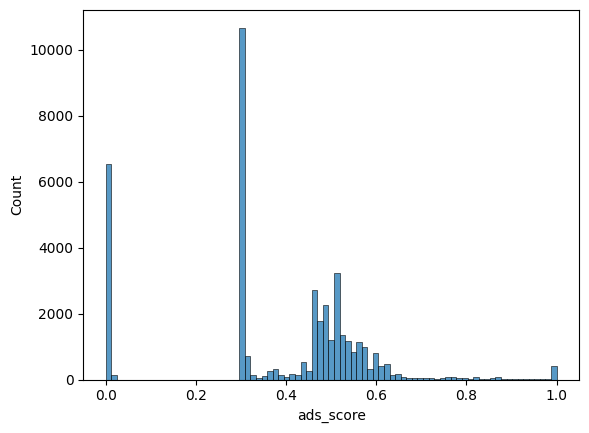

In [47]:
min_max_scale("ads_score")

sns.histplot(df2['ads_score'])

In [48]:
df2[df2['ads_score'] < 0.2].shape[0] / len(df2)

0.1640895793898572

In [49]:
df2['ads_score'].describe()

count    40679.000000
mean         0.379286
std          0.209832
min          0.000000
25%          0.298891
50%          0.463185
75%          0.513761
max          1.000000
Name: ads_score, dtype: float64

In [51]:

bin_edges = [0, 0.164, 0.50, 1.01]  
bin_labels = ['0-16.4%', '16.4%-50%', '>50%']
df2['ads_score_category'] = pd.cut(df2['ads_score'], bins=bin_edges, labels=bin_labels)



In [52]:
df2['ads_score_category']

0        >50%
1        >50%
2        >50%
3        >50%
4        >50%
         ... 
40674     NaN
40675     NaN
40676     NaN
40677     NaN
40678     NaN
Name: ads_score_category, Length: 40679, dtype: category
Categories (3, object): ['0-16.4%' < '16.4%-50%' < '>50%']

In [53]:
df2['country'] = ads['delivery_country']

In [54]:
df2

,punish_num_scaled,avg_ad_revenue_scaled,ad_revenue_scaled,baseline_st_scaled,date_diff_bet_start_date_scaled,date_difference_bet_punish_date_scaled,risk,profitability,urgency,complexity,ads_score,ads_score_category,country
0,2.767677,25.436666,11.774193,0.868897,-0.355755,-4.004660,0.058742,17.239182,0.355755,0.868897,1.000000,>50%,US
1,2.767677,5.543713,4.450236,0.702189,-0.393693,-3.984882,0.066653,4.887627,0.393693,0.702189,1.000000,>50%,SA
2,5.734378,-0.098747,-0.132028,0.959828,-0.323774,-4.004660,1.838763,-0.118715,0.323774,0.959828,0.812280,>50%,AU
3,5.734378,-0.098747,-0.123605,0.565791,-0.323774,-4.004660,1.838763,-0.113661,0.323774,0.565791,0.769623,>50%,NZ
4,5.734378,-0.098747,-0.132516,0.565791,-0.323774,-4.004660,1.838763,-0.119008,0.323774,0.565791,0.768738,>50%,NZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40674,-0.199025,-0.127348,-0.136055,-1.010355,2.256954,0.250005,-0.019413,-0.132572,-2.256954,-1.010355,0.000000,NaN,VN
40675,-0.199025,-0.127348,-0.136055,-1.010355,2.256954,0.250005,-0.019413,-0.132572,-2.256954,-1.010355,0.000000,NaN,BR
40676,-0.199025,-0.127348,-0.136055,-1.010355,2.256954,0.250005,-0.019413,-0.132572,-2.256954,-1.010355,0.000000,NaN,BE
40677,-0.199025,-0.127348,-0.136055,-1.010355,2.256954,0.250005,-0.019413,-0.132572,-2.256954,-1.010355,0.000000,NaN,TR


In [55]:
distinct_country_counts = df2.groupby('ads_score_category')['country'].nunique()
distinct_country_counts

/var/folders/ls/8gbvtyrd07g59v3ct9lcsmm00000gn/T/ipykernel_16830/4049585631.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distinct_country_counts = df2.groupby('ads_score_category')['country'].nunique()


ads_score_category
0-16.4%      39
16.4%-50%    59
>50%         59
Name: country, dtype: int64